In [ ]:
import numpy as np
import pandas as pd
import re
import string
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/wzl20/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def data_cleaning(raw_data): 
    raw_data = raw_data.translate(str.maketrans('', '', string.punctuation + string.digits)) 
    words = raw_data.lower().split() 
    # stops = set(stopwords.words( "english")) 
    stops = set(stopwords)
    # stops = stopwords.words('english')
    useful_words = [w for w in words if not w in stops] 
    return( " ".join(useful_words))

In [ ]:
df = pd.read_csv("cp2077_reviews.csv.zip", compression="zip")
df["Review"] = df["Review"].astype("str")
df['Review']=df['Review'].apply(data_cleaning) 
df

,Review,Recommended or Not Recommended,Date Timestamp Created
0,day someone came ps version game quite journey...,True,1645046263
1,replay immediately demolish adam smasher,True,1663224196
2,patch fixed everything quests make sense fixer...,True,1645267750
3,watches edgerunners downloads cyberpunk time life,True,1667117035
4,remember hearing cyberpunk around announced in...,True,1664423074
...,...,...,...
16594,boobs d,True,1608792512
16595,great main story cyberpunk atmosphere good vis...,True,1608792267
16596,got hardware run game definitely,True,1608777643
16597,glitches experience enough hold awesomeness ga...,True,1608777582


In [ ]:
df['Recommend'] = df['Recommended or Not Recommended'].apply(lambda x: 'Recommended' if x == True else 'Not Recommended')
df.drop(['Recommended or Not Recommended'], axis=1, inplace=True)
df

,Review,Date Timestamp Created,Recommend
0,day someone came ps version game quite journey...,1645046263,Recommended
1,replay immediately demolish adam smasher,1663224196,Recommended
2,patch fixed everything quests make sense fixer...,1645267750,Recommended
3,watches edgerunners downloads cyberpunk time life,1667117035,Recommended
4,remember hearing cyberpunk around announced in...,1664423074,Recommended
...,...,...,...
16594,boobs d,1608792512,Recommended
16595,great main story cyberpunk atmosphere good vis...,1608792267,Recommended
16596,got hardware run game definitely,1608777643,Recommended
16597,glitches experience enough hold awesomeness ga...,1608777582,Recommended


Recommended        11074
Not Recommended     5525
Name: Recommend, dtype: int64


<AxesSubplot:>

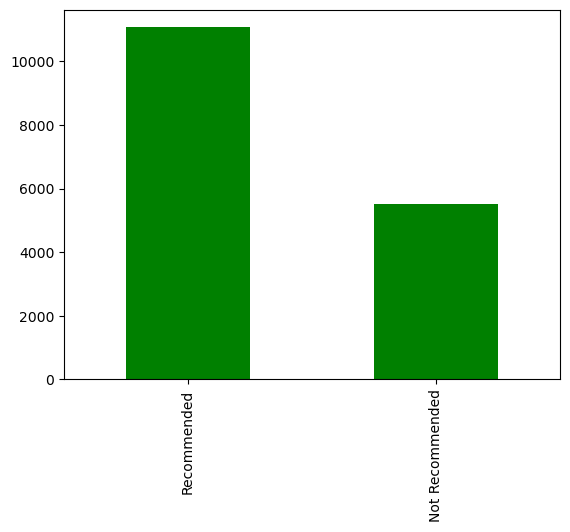

In [ ]:
print(df['Recommend'].value_counts())
df['Recommend'].value_counts().plot.bar(color='green')

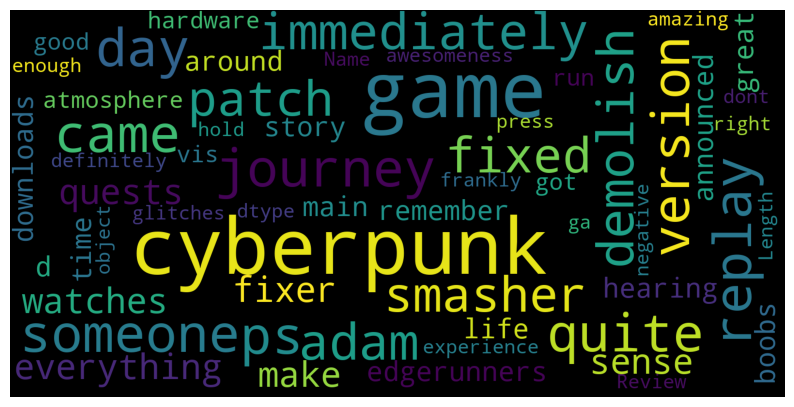

In [ ]:
def generate_wordcloud(data, title=None):
    wordcloud = WordCloud(
        stopwords=stopwords, max_words=100, max_font_size=40, scale=4
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

generate_wordcloud(df["Review"])


In [ ]:
# 5. Import API’s from Tensorflow required to build the LSTM Model
import tensorflow as tf

# from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
# 6. Tokenize words

y = df["Recommend"].values
reviews = df["Review"]
# test_reviews = df_test["review"]
max_features = 16000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(reviews))
list_tokenized = tokenizer.texts_to_sequences(reviews)
df["Review"] = list_tokenized
list_tokenized = pad_sequences(list_tokenized, maxlen=929)
df["Review"] = list(list_tokenized)
# df["Review"] = list_tokenized
df
# list_tokenized_test = tokenizer.texts_to_sequences(test_reviews)
# list_tokenized = np.asarray(list_tokenized).astype('float32')
# df["Review"] = df["Review"].values.tolist()
# df.Review

# # compute the average length of Reviews
# new_array = np.array(df["Review"])
# ls = []
# for i in range(0,len(new_array)):
#     ls.append(len(new_array[i]))
# meanlen = np.array(ls).mean()
# maxlen = np.array(ls).max() # in case we need to use maxlen
# maxlen


,Review,Date Timestamp Created,Recommend
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1645046263,Recommended
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1663224196,Recommended
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1645267750,Recommended
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1667117035,Recommended
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1664423074,Recommended
...,...,...,...
16594,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1608792512,Recommended
16595,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1608792267,Recommended
16596,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1608777643,Recommended
16597,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1608777582,Recommended


In [ ]:
# 7. Now lets define the callbacks that is necessary to perform early stopping and saving model checkpoints.

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.95:
            print('\n Stopped Training!\n')
            self.model.stop_training = True
def train_model(model, model_name, n_epochs, batch_size, X_data, y_data, validation_split):    
    checkpoint_path = model_name+"_cp-{epoch:04d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,  save_weights_only=True, verbose=1)
    callbacks = myCallback()
    history = model.fit(
        X_data,
        y_data,
        steps_per_epoch=batch_size,
        epochs=n_epochs,
        validation_split=validation_split,
        verbose=1,
        callbacks=[cp_callback]
    )
    return history

In [ ]:
# define graph function
def generate_graph(history):
    plt.plot(history.history['accuracy'], 'b')
    plt.plot(history.history['val_accuracy'], 'r')
    plt.title('Model Accuracy'),
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [ ]:
df.head()
df["Recommend"] = df["Recommend"].map(lambda x: int(1) if x=="Recommended" else int(0))
df.head()
# df["Review"] = np.array(df["Review"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df["Review"], df["Recommend"], test_size=0.33, random_state=42)
X_train

1523     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6922     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11840    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5206     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13858    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
11284    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11964    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5390     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
860      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15795    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Review, Length: 11121, dtype: object

In [ ]:
X_train = X_train.values.tolist()
y_train = y_train.values.tolist()

# X_train = np.array(X_train, dtype=object)
# y_train = np.array(y_train, dtype=object)

# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_train
y_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64) 
X_tensor = tf.convert_to_tensor(X_train, dtype=tf.int64) 
# X_tensor = tf.convert_to_tensor(X_train, dtype=tf.object) 


In [ ]:
X_test = X_test.values.tolist()
y_test = y_test.values.tolist()

y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64) 
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.int64) 

In [ ]:
# define predict function
def predict_func(model):
  prediction = model.predict(X_test_tensor)
  y_pred = (prediction > 0.5)
  # df_test["Recommend"] = df_test.index.map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
  # y_test = df_test["Recommend"]
  cf_matrix = confusion_matrix(y_pred, y_test_tensor)
  f1_score_calc = cf_matrix[0][0] / (cf_matrix[0][0] + 0.5 * (cf_matrix[0][1] + cf_matrix[1][0]))
  print('F1-score: %.3f' % f1_score_calc)
  print("Confusion Matrix : ", cf_matrix)
  return f1_score_calc

In [ ]:
class Model_C():
  def __new__(self):
    embed_size = 64
    model = Sequential()
    model.add(Embedding(max_features, embed_size, mask_zero=False))
    model.add(Bidirectional(LSTM(75, return_sequences = True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.03))
    model.add(Dense(8, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    return model
    
model_c = Model_C()
history_c = train_model(model_c, "model_c", 5, 64, X_tensor, y_tensor,0.2)
model_c_score = predict_func(model_c)

Epoch 1/5
64/64 [==============================] - ETA: 0s - loss: 0.6430 - accuracy: 0.6647
Epoch 1: saving model to model_c_cp-0001.ckpt
64/64 [==============================] - 83s 1s/step - loss: 0.6430 - accuracy: 0.6647 - val_loss: 0.6243 - val_accuracy: 0.6724
Epoch 2/5
64/64 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7299
Epoch 2: saving model to model_c_cp-0002.ckpt
64/64 [==============================] - 78s 1s/step - loss: 0.5398 - accuracy: 0.7299 - val_loss: 0.5030 - val_accuracy: 0.7694
Epoch 3/5
64/64 [==============================] - ETA: 0s - loss: 0.3715 - accuracy: 0.8436
Epoch 3: saving model to model_c_cp-0003.ckpt
64/64 [==============================] - 79s 1s/step - loss: 0.3715 - accuracy: 0.8436 - val_loss: 0.3988 - val_accuracy: 0.8319
Epoch 4/5
64/64 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.9010
Epoch 4: saving model to model_c_cp-0004.ckpt
64/64 [==============================] - 78s 1s/step - lo

In [ ]:
model_c_score = predict_func(model_c)

172/172 [==============================] - 16s 95ms/step
F1-score: 0.720
Confusion Matrix :  [[1230  366]
 [ 590 3292]]


In [ ]:
print(model_c.summary())

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_71 (Embedding)    (None, None, 64)          1024000   
                                                                 
 bidirectional_71 (Bidirecti  (None, None, 150)        84000     
 onal)                                                           
                                                                 
 global_max_pooling1d_71 (Gl  (None, 150)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_213 (Dense)           (None, 16)                2416      
                                                                 
 dropout_142 (Dropout)       (None, 16)                0         
                                                                 
 dense_214 (Dense)           (None, 8)               

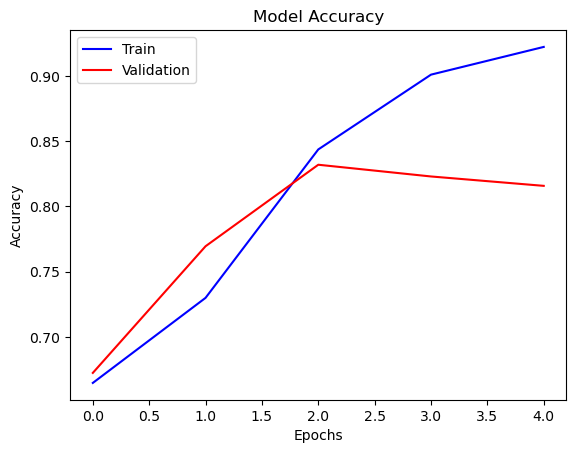

In [ ]:
generate_graph(history_c)